In [27]:
import pandas, seaborn, scipy, numpy, matplotlib, collections, sklearn, math

%matplotlib inline
from matplotlib import pyplot

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500



%matplotlib inline
%config InlineBackend.figure_format = 'png'

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
#matplotlib.rc('text', usetex=False)
#reload(c)

pandas.set_option('display.max_rows', 500)
pandas.set_option('display.max_columns', 500)

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')
    
def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values)
    if numpy.nan in bars:
        return pattern % numpy.mean(values)
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2)) 
    return (pattern + " (" + pattern + " - " + pattern + ")") % ((numpy.mean(values),) + bars)


In [2]:
sources = pandas.read_csv("../data/sources.csv", index_col="source_id")
sources = sources.ix[sources.cohort == "AOCS"]

In [3]:
df = pandas.read_csv("../data/deconstructsigs_output_with_chicken.csv", index_col=0)
df.columns = [x.replace(".", " ") for x in df.columns]
df["kind"] = [x.split()[-1] for x in df.Sample]
df["source_id"] = [x.split()[0] for x in df.Sample]
del df["Sample"]
df = df.set_index(["source_id", "kind"], drop=False)
df = df.loc[:,(df != 0).any(axis=0)]
signatures = sorted([x for x in df.columns if x not in ('kind', 'source_id')], key=lambda x: x[0])
df["treated"] = [sources.ix[s].treated if s in sources.index else False for s in df.source_id]
df

,,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 8,Signature 9,Signature 10,Signature 12,Signature 13,Signature 14,Signature 16,Signature 18,Signature 19,Signature 22,Signature 23,Signature 25,Signature 26,Signature 29,Chicken cisplatin,Chicken cyclophosphamide,Chicken etoposide,kind,source_id,treated
source_id,kind,,,,,,,,,,,,,,,,,,,,,,,,,,
etoposide,check,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.924169,check,etoposide,False
cyclophosphamide,check,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.965401,0.000000,check,cyclophosphamide,False
cisplatin,check,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.938257,0.000000,0.000000,check,cisplatin,False
AOCS-166-1/SP102133,all,0.000000,0.000000,0.000000,0.000000,0.000000,0.063701,0.000000,0.250905,0.000000,0.514761,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094825,0.000000,0.000000,0.000000,0.000000,all,AOCS-166-1/SP102133,False
AOCS-092-13/SP101630,new,0.000000,0.000000,0.158093,0.138944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093589,0.107358,0.146737,0.000000,0.000000,0.000000,0.075620,0.156505,0.000000,new,AOCS-092-13/SP101630,True
AOCS-119-13/SP101732,all,0.000000,0.000000,0.243012,0.000000,0.000000,0.000000,0.474244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-119-13/SP101732,True
AOCS-135-14/SP101860,all,0.000000,0.000000,0.279925,0.000000,0.124117,0.000000,0.373382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-135-14/SP101860,True
AOCS-135-13/SP101855,all,0.000000,0.000000,0.280556,0.000000,0.106046,0.000000,0.392249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-135-13/SP101855,True
AOCS-088-1/SP101610,all,0.000000,0.000000,0.339112,0.000000,0.000000,0.000000,0.432023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-088-1/SP101610,False


In [4]:
def make_draw_df(draw_df):
    signature_descriptions = {
    1: 'Age',
    3: 'BRCA',
    4: 'Smoking',
    6: 'MMR',
    9: 'AID',
    10: 'POLE',
    13: 'AID/APOBEC',
    22: 'Aristolochic acid',
    26: 'MMR',
    29: 'Tobacco chewing',
    }
    column_renames = {
        'Chicken cisplatin': "Cisplatin",
        'Chicken cyclophosphamide': 'Cyclophosphamide',
        'Chicken etoposide': 'Etoposide',
    }
    column_renames.update(
        dict(("Signature %d" % num, ("(%d) %s" % (num, signature_descriptions.get(num, ''))).strip())
                  for num in range(30)))
    if 'treated' in draw_df.columns:
        draw_df["treated"] = (draw_df.treated == True).astype(float)
        draw_df["unique"] = (draw_df.kind == "new").astype(float)
        draw_df["control"] = (draw_df.kind == "check").astype(float)
        draw_df = draw_df[["treated", "unique", "control"] + signatures]
    else:
        draw_df = draw_df[signatures]

    draw_df.index = [x[0].split("/")[0] for x in draw_df.index]
    draw_df = draw_df.ix[sorted(draw_df.index)]
    draw_df.columns = [column_renames.get(x, x) for x in draw_df.columns]
    return draw_df

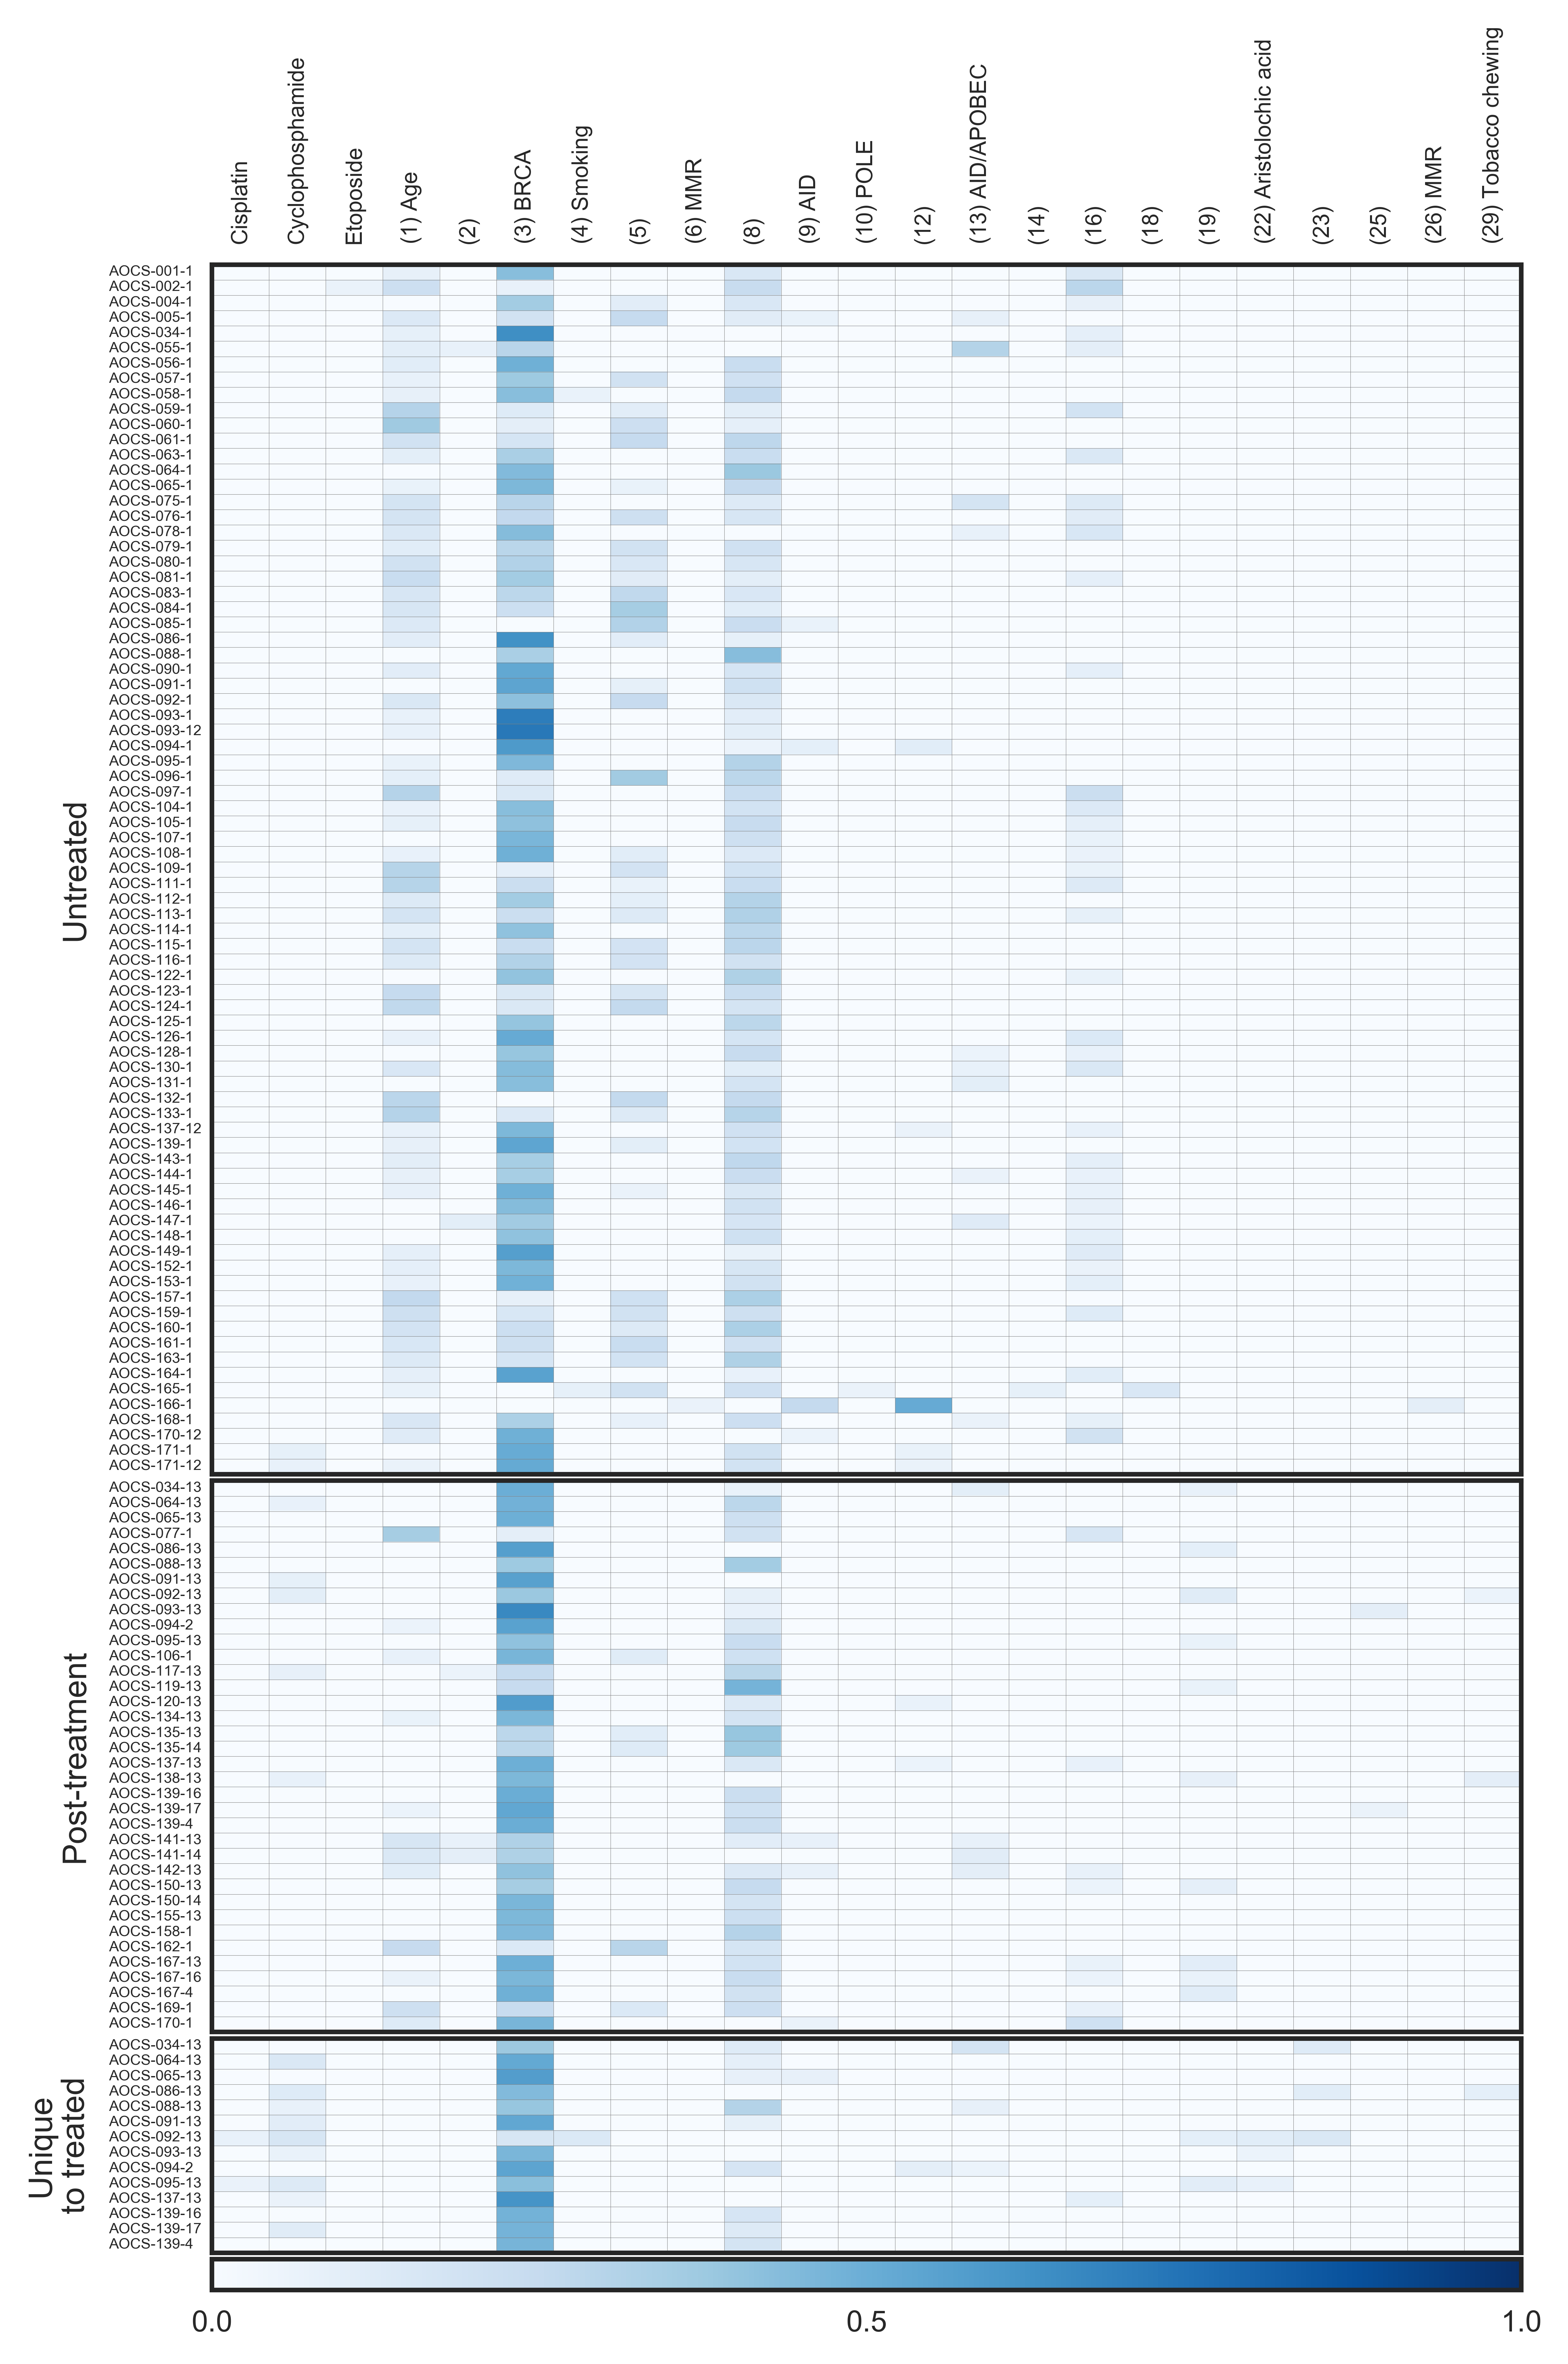

In [43]:
seaborn.set_context('paper')
seaborn.set_style('white')

chunks = [
#    ("Control", df.ix[(df.kind == "check")]),
    ("Untreated", df.ix[(df.kind == "all") & (~df.treated)]),
    ("Post-treatment", df.ix[(df.kind == "all") & (df.treated)]),
    ("Unique\nto treated", df.ix[(df.kind == "new")]),
]


fig = pyplot.figure(figsize=(6,9))
gs = matplotlib.gridspec.GridSpec(len(chunks) + 1, 1, height_ratios=[len(x[1]) for x in chunks] + [2])
for (i, ((label, chunk), spec)) in enumerate(zip(chunks, gs)):
    ax = pyplot.subplot(spec, sharex=pyplot.gca() if i > 0 else None)
    draw_chunk = make_draw_df(chunk[signatures].copy())
    heatmap = ax.imshow(
        draw_chunk.values,
        cmap=pyplot.cm.Blues,
        interpolation='nearest',
        aspect='auto',
        vmin=0,
        vmax=1)

    pyplot.ylabel(label)
    ax.set_yticks(numpy.arange(draw_chunk.shape[0])+0.0, minor=False)
    ax.set_yticklabels(draw_chunk.index, minor=False, fontsize=4, ha='left')
    yax = ax.get_yaxis()
    yax.set_tick_params(pad=28.0)
    #ax.invert_yaxis()
    for v in range(draw_chunk.shape[1]):
        pyplot.axvline(v + .5, color='gray', lw=.10)
    for v in range(draw_chunk.shape[0]):
        pyplot.axhline(v + .5, color='gray', lw=.10)

    if i == 0:
        ax.xaxis.tick_top()
        ax.set_xticks(numpy.arange(draw_chunk.shape[1])+0.0, minor=False)
        ax.set_xticklabels(draw_chunk.columns, minor=False, rotation=90, fontsize=6)
        #heatmap.colorbar(use_gridspec=True)
    else:
        ax.axes.get_xaxis().set_visible(False)

cbar_ax = pyplot.subplot(gs[-1])
pyplot.colorbar(heatmap, cax=cbar_ax, orientation='horizontal', ticks=[0,.5,1.0])
pyplot.tight_layout(h_pad=0.1)
pyplot.savefig("../figures/signatures.pdf")


In [40]:
df[signatures].sum(0).sort(inplace=False)

Signature 6                  0.063701
Signature 10                 0.065653
Signature 14                 0.085651
Signature 26                 0.094825
Signature 18                 0.150622
Signature 25                 0.159187
Signature 22                 0.239470
Signature 29                 0.246238
Signature 4                  0.290570
Signature 23                 0.380090
Signature 2                  0.398685
Signature 9                  0.830304
Chicken etoposide            0.989777
Signature 12                 1.047597
Signature 19                 1.074088
Chicken cisplatin            1.079939
Signature 13                 1.826881
Chicken cyclophosphamide     2.517707
Signature 16                 5.073197
Signature 5                  7.449950
Signature 1                 10.933707
Signature 8                 23.020508
Signature 3                 48.843483
dtype: float64

In [38]:
df[signatures].sum(1)

source_id             kind 
etoposide             check    0.924169
cyclophosphamide      check    0.965401
cisplatin             check    0.938257
AOCS-166-1/SP102133   all      0.924192
AOCS-092-13/SP101630  new      0.876846
AOCS-119-13/SP101732  all      0.784685
AOCS-135-14/SP101860  all      0.777424
AOCS-135-13/SP101855  all      0.778851
AOCS-088-1/SP101610   all      0.771136
AOCS-150-13/SP102010  all      0.746934
AOCS-004-1/SP101519   all      0.689626
AOCS-088-13/SP101612  all      0.731317
AOCS-034-13/SP101524  new      0.798981
AOCS-092-13/SP101630  all      0.746066
AOCS-088-13/SP101612  new      0.852999
AOCS-128-1/SP101795   all      0.765661
AOCS-125-1/SP101775   all      0.674621
AOCS-122-1/SP101748   all      0.794863
AOCS-095-13/SP101650  all      0.708469
AOCS-148-1/SP101990   all      0.704060
AOCS-095-13/SP101650  new      0.793238
AOCS-131-1/SP101815   all      0.709154
AOCS-146-1/SP101971   all      0.711916
AOCS-086-13/SP101606  new      0.764238
AOCS-064-1/S

In [35]:
base_sigs = ["Signature 1", "Signature 3", "Signature 8"]
print(
    mean_with_errorbars(df.ix[(df.kind == "all") & (df.treated)][base_sigs].sum(1), decimals=3))
print(
    mean_with_errorbars(df.ix[(df.kind == "all") & (~df.treated)][base_sigs].sum(1), decimals=3))



0.651 (0.627 - 0.675)
0.653 (0.626 - 0.676)
